# **Problema 1: capacidade termica de um solido**

**calculo da quadratura gaussiana manualmente (sem import)**

In [1]:
import numpy as np

# constantes e arrays utilizados

p_d = 6.022e28
theta = 428
V = 1e-3
k_b = 1.38e-23
N = 50

def cv(T):
  N = 50
  a, b = 0, theta/T
  h = (b-a)/N

  const = 9*V*p_d*k_b*(T/theta)**3

  xk = np.linspace(-1, 1, N)
  xk_line = 1/2*(b-a)*xk + 1/2*(b+a)



  # calculo das integrais por trapezio

  def funcPhi(x, k):
    # xk = np.linspace(-1, 1, N)
    prod = 1
    for m in range(1, N):
      if m != k:
        prod *= (x-xk[m])/(xk[k]-xk[m])
    return prod

  def somat(a, h, N, k):
    soma = 0
    for k2 in range(1, N):
      soma += funcPhi(a + k2*h, k)
    return soma

  def integral_trap(a, b, k):       # a = -1,   b = 1   e   k determina um valor do array phi
    N = 50
    h = (b-a)/N
    i_ab = (h/2)*(funcPhi(a, k)+funcPhi(b, k)+2*somat(a, h, N, k))
    return i_ab



  # calculo do array wk', usando eq(5.62) e eq(5.60)

  wk = []

  for k in range(1, N):
    wk.append(integral_trap(-1, 1, k))

  wk = np.array(wk)
  wk_line = 1/2*(b-a)*wk



  # calculo do array f(xk'), onde f é a funcao(x) dentro da integral de Cv

  def funcX(xk_line, N):
    f = []

    for k in range(1, N):
      nom = (xk_line[k]**4)*(np.exp(xk_line[k]))
      den = (np.exp(xk_line[k])-1)**2

      f.append(nom/den)
    return f
  fxk_line = funcX(xk_line, N)



  # funcao do somatorio da eq(5.63)

  def somatorio(wk_line, fxk_line):

    somatorio = 0
    for k in range(1, N-1):
      somatorio += wk_line[k]*fxk_line[k]
    return somatorio

  return const*somatorio(wk_line, fxk_line)

T = 100
Cv = cv(100)

print(f'N: {N} and Cv(100K): {Cv:.2f} J/K')

N: 50 and Cv(100K): 1150.53 J/K


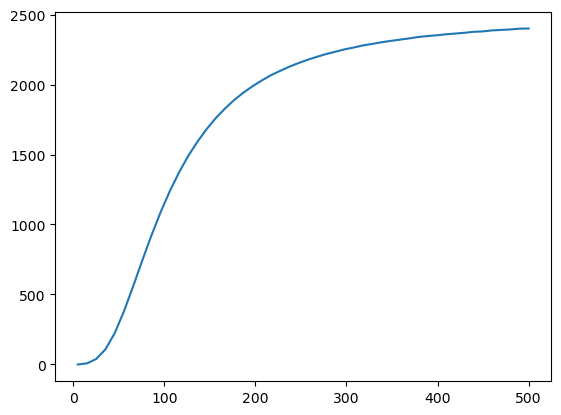

In [2]:
import matplotlib.pyplot as plt

Ts = np.linspace(5, 500, 50)
Cv = []

for T in Ts:
  Cv.append(cv(T))

plt.plot(Ts, Cv)
plt.show()

# **Problema 2: a constante de Stefan-Boltzmann**

$$\int I(\omega) d\omega = \int \frac{\hslash}{4\pi^{2}c^{2}} \frac{\omega^{3}}{(e^{\frac{\hslash \omega}{k_{B}T}}-1)} d\omega$$

**Fazendo a substituição:**
$$x = \frac{\hslash \omega}{k_{B}T}  \rightarrow dx= \frac{\hslash}{k_{B}T} d\omega,\ \ \ \ \ \ temos\ \ \ \ \ \omega^{3} = \frac{x^{3}k_{B}^{3} T^{3}}{\hslash^{3}}\ \ e\ \ d\omega = \frac{k_{B}T}{\hslash} dx$$

**onde chegamos no resultado esperado apenas substituindo esses valores na integral:**
$$W = \int_{0}^{\infty} I(\omega)d\omega = \frac{\hslash}{4\pi^{2}c^{2}} \int_{0}^{\infty} \frac{\frac{x^{3}k_{B}^{3} T^{3}}{\hslash^{3}}}{(e^x-1)}$$

$$\therefore\  \boxed{W =\frac{k_{B}^{4}T^{4}}{4\pi^{2}c^{2}\hslash^{3}} \int_{0}^{\infty} \frac{x^{3}}{(e^{x}-1)}dx}$$

In [3]:
import numpy as np

kb = 1.38e-23     # m2 Kg/ s2 K
c = 3e8           # m/ s
h = 6.626e-34     # m2 Kg/ s
h_ = h/(2*np.pi)
T = 100

def const(T):
  nom, den = (kb**4)*T**4, 4*(np.pi**2)*(c**2)*(h_**3)
  return nom/den

N = 1000
a, b = 0.05, 1.02
h = (b-a)/N

def f(y):
  x = (1/y)-1
  nom = x**3
  den = np.exp(x)-1

  return (nom/den)*(1/(y**2))

def integ_simp(a, b, h, N):
  soma = 0

  for k in range(1, N):
    if k%2 != 0:
      soma += 4*f(a+k*h)
    else:
      soma += 2*f(a+k*h)

  i_simp = (h/3)*(f(a) + f(b) + soma)
  return i_simp

W = const(T)*integ_simp(a, b, h, N)

print(f'W: {W:.4f} J/m²')

W: 5.6520 J/m²


**Utilizamos o método de símpson, segue calculo do erro abaixo:**

In [4]:
W2 = const(T)*integ_simp(a, b, h, 2*N)

e2_euler_maclau = (1/3)*(W2-W)
print(f'erro euler_maclaurin: {100*abs(e2_euler_maclau):.2f}%')

erro euler_maclaurin: 1.43%


In [5]:
cst_stf_btz = W/(T**4)

print(f'const stefan_boltzman: {cst_stf_btz*1e8:.3f} Kg/s3K4')

const stefan_boltzman: 5.652 Kg/s3K4


**Resultado satisfatório, bem próximo do valor real de 5.670 Kg/s3K4**

# **Problema 3: atração gravitacional de uma folha uniforme**

In [59]:
import intinf
from intinf import *
import numpy as np

G = 6.674e-11       # m3/ kg s2
sig = 100           # Kg/ m2

L = 10
a, b = 0, L/2
N = 100

zs = np.linspace(0, 10, 100)

def func(x, y, z):
    return 1/((x**2)+(y**2)+(z**2))**3/2
        
def forca(z):
    x, wx = gaussxwab(N, a, b)
    
    y = ((b-a)/2)*x + (b+a)/2             # arrumar os limites para -1 a 1
    wy = ((b-a)/2)*wx + (b+a)/2           # wy deve mudar igual y

    sum = 0
    for i in range(N):
        for j in range(N):
            sum += wx[i]*wy[j]*func(x[i], y[j], z)
    return 4*sum
    
forcas = []

for z in zs:
    forcas.append(forca(z))

print(forcas)

[0.37099147311451913, 0.36974822786977307, 0.3660550400330032, 0.36001920052575453, 0.35181194625278994, 0.34165795856367615, 0.32982225375299806, 0.31659574739905555, 0.3022807753686581, 0.2871776940751246, 0.2715734096790607, 0.2557323600556151, 0.23989015104519068, 0.22424977287105236, 0.20898011866014726, 0.19421640210643945, 0.18006201909583924, 0.16659140381116858, 0.15385347544099498, 0.14187533976613942, 0.13066598624430417, 0.12021979538624714, 0.11051973677188952, 0.1015401918353359, 0.09324937681753082, 0.08561137086980898, 0.07858777386447371, 0.07213903002383357, 0.0662254589876097, 0.06080803715180294, 0.05584897047641168, 0.0513120966005357, 0.04716314985242098, 0.0433699181808207, 0.03990231654604048, 0.036732397127668376, 0.03383431295630511, 0.031184248308949468, 0.028760326423766802, 0.026542502761831337, 0.0245124501270702, 0.022653440400169866, 0.020950226395714797, 0.019388926365041206, 0.017956912895390236, 0.016642707359604336, 0.015435880615964183, 0.0143269603

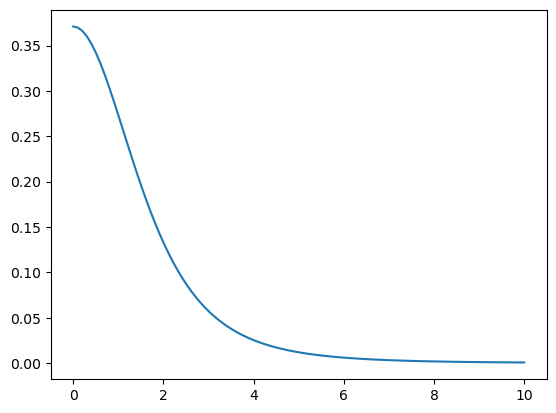

In [60]:
import matplotlib.pyplot as plt

plt.plot(zs, forcas)

**Dividindo a placa em n pequenos quadrados, podemos calcular a força de cada quadrado individualmente e integrar para toda placa, para isso podemos perceber que as componentes de cada uma das forças, paralelas ao plano se cancelam (corpo alinhado ao centro da placa), assim apenas a componente vertical (eixo z) atuaria na partícula, atraíndo-a em direção à placa:**

$$dF_{g} = \frac{G\ m\ dM}{r^{2}}cos(\theta) = \frac{G\ m\ dM}{(z^{2}+x^{2}+y^{2})}cos(\theta)$$

**como:**
$$cos(\theta) = \frac{z}{(z^{2}+x^{2}+y^{2})^{1/2}}\ \ \ e\ \ \ d
M= \sigma \ dxdy$$

**temos:**
$$dF_{square} = \frac{G\ m\ z\ \sigma \ dxdy}{(z^{2}+x^{2}+y^{2})^{3/2}}$$

**como a placa é simétrica nos eixos x e y, podemos multiplicar a integral por 4 e integrar em dx e dy:**
$$4\ \int_{F(0)}^{F_{g}(L/2)} dF_{square} = F_{total} = 4G\ m\ z\ \sigma\ \int_{0}^{L/2}\int_{0}^{L/2} \frac{dxdy}{(z^{2}+x^{2}+y^{2})^{3/2}}$$

**logo:**
$$\therefore\  \boxed{F_{z} = 4G\ m\ z\ \sigma\ \int_{0}^{L/2}\int_{0}^{L/2} \frac{dxdy}{(z^{2}+x^{2}+y^{2})^{3/2}}}$$